In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ColabNotebooks/ML/projects/natural-gas/

/content/drive/MyDrive/ColabNotebooks/ML/projects/natural-gas


### Preparing the data for training the model

In [3]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [4]:
data = pd.read_csv("processed_nasdaq.csv", index_col="Date", parse_dates=True)
data = data[::-1]

In [5]:
data

,close,vol,open,high,low,season
Date,,,,,,
2012-05-02,2.253,153675.0,2.371,2.384,2.236,Spring
2012-05-03,2.340,152267.0,2.260,2.379,2.253,Spring
2012-05-04,2.279,112541.0,2.340,2.373,2.265,Spring
2012-05-07,2.336,84553.0,2.277,2.358,2.273,Spring
2012-05-08,2.393,147686.0,2.323,2.460,2.280,Spring
...,...,...,...,...,...,...
2022-04-25,6.669,29612.0,6.414,6.966,6.345,Spring
2022-04-26,6.850,31569.0,6.836,7.050,6.662,Spring
2022-04-27,7.267,2630.0,6.858,7.344,6.800,Spring


In [6]:
cols = ["close", "open", "high", "low"]
new_data = data[cols].astype(float)
new_data

,close,open,high,low
Date,,,,
2012-05-02,2.253,2.371,2.384,2.236
2012-05-03,2.340,2.260,2.379,2.253
2012-05-04,2.279,2.340,2.373,2.265
2012-05-07,2.336,2.277,2.358,2.273
2012-05-08,2.393,2.323,2.460,2.280
...,...,...,...,...
2022-04-25,6.669,6.414,6.966,6.345
2022-04-26,6.850,6.836,7.050,6.662
2022-04-27,7.267,6.858,7.344,6.800


In [7]:
new_data.isnull().sum()

close    0
open     0
high     0
low      0
dtype: int64

In [8]:
scaler = StandardScaler()
scaler = scaler.fit(new_data)
scaled_data = scaler.transform(new_data)

In [9]:
scaled_data 

array([[-0.98920895, -0.86240869, -0.88456226, -0.97145537],
       [-0.89227485, -0.98674779, -0.88994276, -0.9518697 ],
       [-0.96024014, -0.89713402, -0.89639935, -0.93804452],
       ...,
       [ 4.59731486,  4.16380353,  4.45288639,  4.28672046],
       [ 4.17503873,  4.76533595,  4.53682207,  4.37773621],
       [ 4.57168861,  4.25453747,  4.4432015 ,  4.29248095]])

In [10]:
trainX = []
trainy = []

n_future = 1
n_past = 14

In [11]:
scaled_data.shape

(2551, 4)

In [12]:
for i in range(0, len(scaled_data)-n_past):
    trainX.append(scaled_data[i: i+n_past, :])
    trainy.append(scaled_data[i+n_past: n_past+n_future+i, 0])


trainX, trainy = np.array(trainX), np.array(trainy)

In [13]:
trainX

array([[[-0.98920895, -0.86240869, -0.88456226, -0.97145537],
        [-0.89227485, -0.98674779, -0.88994276, -0.9518697 ],
        [-0.96024014, -0.89713402, -0.89639935, -0.93804452],
        ...,
        [-0.60927185, -0.57788497, -0.57249369, -0.65808468],
        [-0.44437246, -0.5689236 , -0.48102532, -0.54517906],
        [-0.59255907, -0.46922828, -0.49824289, -0.56476473]],

       [[-0.89227485, -0.98674779, -0.88994276, -0.9518697 ],
        [-0.96024014, -0.89713402, -0.89639935, -0.93804452],
        [-0.89673159, -0.96770487, -0.91254082, -0.92882774],
        ...,
        [-0.44437246, -0.5689236 , -0.48102532, -0.54517906],
        [-0.59255907, -0.46922828, -0.49824289, -0.56476473],
        [-0.48336894, -0.55884205, -0.51546047, -0.57628571]],

       [[-0.96024014, -0.89713402, -0.89639935, -0.93804452],
        [-0.89673159, -0.96770487, -0.91254082, -0.92882774],
        [-0.83322304, -0.91617695, -0.80277878, -0.92076305],
        ...,
        [-0.59255907, -0.46

In [14]:
trainy

array([[-0.48336894],
       [-0.44994339],
       [-0.55022004],
       ...,
       [ 4.59731486],
       [ 4.17503873],
       [ 4.57168861]])

In [15]:
trainX.shape

(2537, 14, 4)

In [16]:
trainy.shape

(2537, 1)

### Building LSTM Model

relu - rectified linear activation function - to allow the neural network to learn nonlinear dependencies

mse - mean squared error for the regression values

In [17]:
import keras
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainy.shape[1]))
model.compile(optimizer='adam', loss='mae', metrics=keras.metrics.MeanAbsoluteError())
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fit model
history = model.fit(trainX, trainy, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100
143/143 [==============================] - 6s 19ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - val_loss: 0.3276 - val_mean_absolute_error: 0.3276
Epoch 2/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - val_loss: 0.2545 - val_mean_absolute_error: 0.2545
Epoch 3/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - val_loss: 0.2613 - val_mean_absolute_error: 0.2613
Epoch 4/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - val_loss: 0.2308 - val_mean_absolute_error: 0.2308
Epoch 5/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - val_loss: 0.2278 - val_mean_absolute_error: 0.2278
Epoch 6/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - val_loss: 0.2312 - val_mean_absolute_error: 0.2312
Epoc

In [19]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

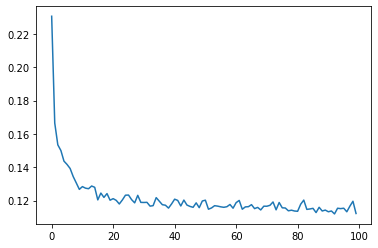

In [20]:
plt.plot(history.history['loss'])

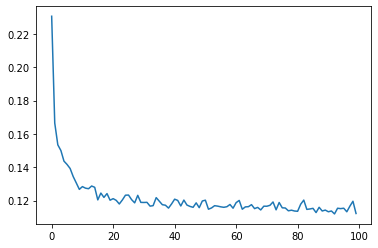

In [21]:
plt.plot(history.history['mean_absolute_error'])

### Predicting

In [22]:
new_data.close.shape[0]*0.2

510.20000000000005

In [23]:
2551 - 510

2041

In [24]:
start = 2041

In [25]:
forecast = model.predict(trainX[start-14:])

16/16 [==============================] - 0s 5ms/step


In [26]:
forecast.shape

(510, 1)

In [27]:
forecast_copies = np.repeat(forecast, new_data.shape[1], axis=1)
y_pred = scaler.inverse_transform(forecast_copies)[:, 0]
y_pred

array([1.9412718, 1.7938967, 1.7338794, 1.7974648, 1.7903024, 1.9107269,
       1.9227902, 1.8918068, 2.0062582, 2.1324189, 1.9119989, 1.9009998,
       1.8210706, 1.841254 , 1.7051653, 1.6241757, 1.7131995, 1.6463172,
       1.8403726, 1.8067344, 1.7649941, 1.6981999, 1.7406904, 1.7870076,
       1.7079859, 1.8816386, 1.8141118, 1.7584164, 1.7831166, 1.8268583,
       1.8091565, 1.7820861, 1.7817947, 1.7713233, 1.7573723, 1.8193668,
       1.714589 , 1.6754906, 1.614858 , 1.655828 , 1.636216 , 1.6783645,
       1.6632614, 1.6240846, 1.6022767, 1.4536806, 1.543528 , 1.7774423,
       1.7168247, 1.6507002, 1.776045 , 1.8243173, 1.8711036, 1.7991953,
       1.7906854, 1.7946358, 1.7285963, 1.7509487, 1.7735298, 1.7115242,
       1.7204741, 1.618203 , 1.6930897, 1.6656505, 1.805264 , 1.7787827,
       1.7133898, 1.8059281, 1.8443012, 1.8266921, 1.7945064, 2.1642272,
       2.1459975, 2.182026 , 2.161247 , 2.2251968, 2.1378706, 2.1776285,
       2.1239383, 2.1835427, 2.3431284, 2.3224888, 

### Visualizaing The Output

In [28]:
y_pred.shape

(510,)

In [29]:
new_data.iloc[start:, 0].shape

(510,)

In [30]:
x = new_data.iloc[start:, 0].values

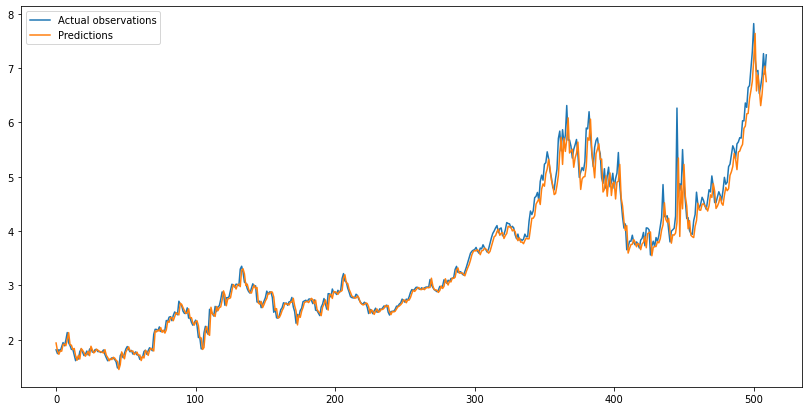

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(x, label="Actual observations")
plt.plot(y_pred, label="Predictions")
plt.legend()
plt.show()

# **Accuracy**

In [32]:
from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(x, y_pred)
R2 = r2_score(x, y_pred)
RMSE = sqrt(mean_squared_error(x, y_pred))
MAE = mean_absolute_error(x, y_pred)
MAPE = mean_absolute_percentage_error(x, y_pred)


from tabulate import tabulate
results= [["LSTM With NASDAQ",MSE,R2,RMSE,MAE,MAPE]]
col_names = ["Model/Metrics", "MSE","R-Squared","RMSE","MAE","MAPE"]  
print(tabulate(results,headers=col_names,tablefmt="fancy_grid"))

╒══════════════════╤═══════════╤═════════════╤══════════╤═════════╤═══════════╕
│ Model/Metrics    │       MSE │   R-Squared │     RMSE │     MAE │      MAPE │
╞══════════════════╪═══════════╪═════════════╪══════════╪═════════╪═══════════╡
│ LSTM With NASDAQ │ 0.0442074 │    0.974746 │ 0.210256 │ 0.12635 │ 0.0330875 │
╘══════════════════╧═══════════╧═════════════╧══════════╧═════════╧═══════════╛
